<a href="https://colab.research.google.com/github/favourphilic/Deep-Learning/blob/main/Deep_Learning_Frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook shows information about deep learning frameworks.
 * It was web scrapped from wiki pedia using the request library and beautiful soup package.

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url ='https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software'
table_class= 'wikitable sortable jquery-tablesorter'
response = requests.get(url)
print(response.status_code)

200


In [ ]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
comparetable=soup.find('table',{'class':"wikitable"})

In [ ]:
comparetable

<table class="wikitable sortable" style="text-align: center; font-size: 85%; width: auto; table-layout: fixed;">
<tbody><tr>
<th style="width: 12em">Software
</th>
<th>Creator
</th>
<th>Initial release
</th>
<th>Software license<sup class="reference" id="cite_ref-license_1-0"><a href="#cite_note-license-1">[a]</a></sup>
</th>
<th>Open source
</th>
<th>Platform
</th>
<th>Written in
</th>
<th>Interface
</th>
<th><a href="/wiki/OpenMP" title="OpenMP">OpenMP</a> support
</th>
<th><a href="/wiki/OpenCL" title="OpenCL">OpenCL</a> support
</th>
<th><a href="/wiki/CUDA" title="CUDA">CUDA</a> support
</th>
<th><a href="/wiki/ROCm" title="ROCm">ROCm</a> support<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[1]</a></sup>
</th>
<th><a href="/wiki/Automatic_differentiation" title="Automatic differentiation">Automatic differentiation</a><sup class="reference" id="cite_ref-Automatic_differentiation_in_machin_3-0"><a href="#cite_note-Automatic_differentiation_in_machin-3">[2]</a></sup>


In [ ]:
df=pd.read_html(str(comparetable))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.head()

,Software,Creator,Initial release,Software license[a],Open source,Platform,Written in,Interface,OpenMP support,OpenCL support,CUDA support,ROCm support[1],Automatic differentiation[2],Has pretrained models,Recurrent nets,Convolutional nets,RBM/DBNs,Parallel execution (multi node),Actively developed
0,BigDL,Jason Dai (Intel),2016,Apache 2.0,Yes,Apache Spark,Scala,"Scala, Python",NaN,NaN,No,No,NaN,Yes,Yes,Yes,NaN,NaN,NaN
1,Caffe,Berkeley Vision and Learning Center,2013,BSD,Yes,"Linux, macOS, Windows[3]",C++,"Python, MATLAB, C++",Yes,Under development[4],Yes,No,Yes,Yes[5],Yes,Yes,No,?,No[6]
2,Chainer,Preferred Networks,2015,BSD,Yes,"Linux, macOS",Python,Python,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No[7]
3,Deeplearning4j,Skymind engineering team; Deeplearning4j commu...,2014,Apache 2.0,Yes,"Linux, macOS, Windows, Android (Cross-platform)","C++, Java","Java, Scala, Clojure, Python (Keras), Kotlin",Yes,No[8],Yes[9][10],No,Computational Graph,Yes[11],Yes,Yes,Yes,Yes[12],Yes
4,Dlib,Davis King,2002,Boost Software License,Yes,Cross-platform,C++,"C++, Python",Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,NaN


In [ ]:
df.shape

(23, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Software                         23 non-null     object
 1   Creator                          23 non-null     object
 2   Initial release                  23 non-null     object
 3   Software license[a]              23 non-null     object
 4   Open source                      23 non-null     object
 5   Platform                         23 non-null     object
 6   Written in                       22 non-null     object
 7   Interface                        23 non-null     object
 8   OpenMP support                   20 non-null     object
 9   OpenCL support                   20 non-null     object
 10  CUDA support                     23 non-null     object
 11  ROCm support[1]                  22 non-null     object
 12  Automatic differentiation[2]     22 no

In [ ]:
df.set_index('Software', inplace=True)

In [ ]:
indexInitialRelease = df[df['Initial release']=='Initial release'].index
df.drop(indexInitialRelease, inplace=True)

In [ ]:
#lets convert the intial release date to datetime type
df['Initial release'] = pd.to_datetime(df['Initial release'])

In [ ]:
#Lets take a look at all the unique value of each column. This will also help us in cleaning the column

for col in df.columns:
    if df[col].dtypes=='O':
        print (df[col].value_counts())

Intel                                                                         2
Artelnics                                                                     2
Apache Software Foundation                                                    2
Jason Dai (Intel)                                                             1
Microsoft Research                                                            1
Ronan Collobert, Koray Kavukcuoglu, Clement Farabet                           1
Université de Montréal                                                        1
Google Brain                                                                  1
Adam Paszke, Sam Gross, Soumith Chintala, Gregory Chanan (Facebook)           1
Vertex.AI, Intel                                                              1
MathWorks                                                                     1
Berkeley Vision and Learning Center                                           1
François Chollet                        

In [ ]:
import re

* As Seen above form the value counts of each columns, most of the features of each software have unwanted characters. Therefore, I will create a function that cleans the values in each row. such as removing unwanted square bracket and numbers.

In [ ]:
df.columns

Index(['Creator', 'Initial release', 'Software license[a]', 'Open source',
       'Platform', 'Written in', 'Interface', 'OpenMP support',
       'OpenCL support', 'CUDA support', 'ROCm support[1]',
       'Automatic differentiation[2]', 'Has pretrained models',
       'Recurrent nets', 'Convolutional nets', 'RBM/DBNs',
       'Parallel execution (multi node)', 'Actively developed'],
      dtype='object')

In [ ]:
col_to_clean = ['OpenMP support','Automatic differentiation[2]','Has pretrained models','Recurrent nets','Convolutional nets','RBM/DBNs','Parallel execution (multi node)','Actively developed']

In [ ]:
def cleaner():
    for col in col_to_clean:
        df[col]=df[col].str.replace("([[0-9]*])","")
        df[col].replace('?', np.nan, inplace=True)
    return df[col]

* The function above is called cleaner, and it removes all foreign character from each faetures of the dataframe.

In [ ]:
cleaner()

<ipython-input-55-19bce5d498c6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col]=df[col].str.replace("([[0-9]*])","")
/usr/local/lib/python3.8/dist-packages/pandas/core/strings/object_array.py:156: FutureWarning: Possible nested set at position 2
  pat = re.compile(pat, flags=flags)


Software
BigDL                                                               NaN
Caffe                                                                No
Chainer                                                              No
Deeplearning4j                                                      Yes
Dlib                                                                NaN
Flux                                                                Yes
Intel Data Analytics Acceleration Library                           NaN
Intel Math Kernel Library 2017 [15] and later                       NaN
Google JAX                                                          Yes
Keras                                                               Yes
MATLAB + Deep Learning Toolbox (formally Neural Network Toolbox)    Yes
Microsoft Cognitive Toolkit (CNTK)                                   No
Apache MXNet                                                        Yes
Neural Designer                                        

In [ ]:
for col in df.columns:
    if df[col].dtypes=='O':
        print (df[col].value_counts())

Intel                                                                         2
Artelnics                                                                     2
Apache Software Foundation                                                    2
Jason Dai (Intel)                                                             1
Microsoft Research                                                            1
Ronan Collobert, Koray Kavukcuoglu, Clement Farabet                           1
Université de Montréal                                                        1
Google Brain                                                                  1
Adam Paszke, Sam Gross, Soumith Chintala, Gregory Chanan (Facebook)           1
Vertex.AI, Intel                                                              1
MathWorks                                                                     1
Berkeley Vision and Learning Center                                           1
François Chollet                        

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

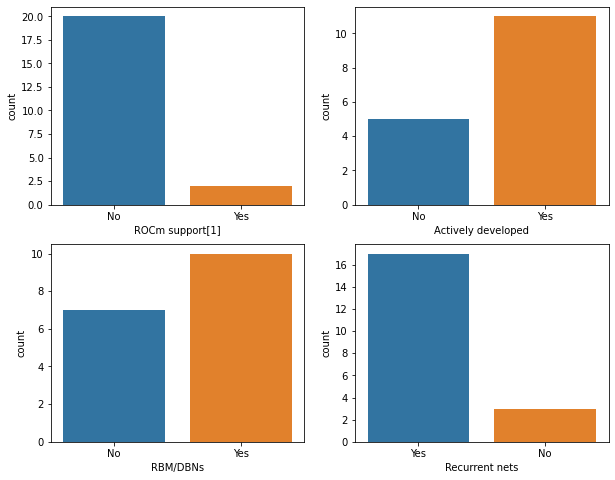

In [ ]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.countplot(df['ROCm support[1]'], ax=ax1)
sns.countplot(df['Actively developed'], ax=ax2)
sns.countplot(df['RBM/DBNs'], ax=ax3)
sns.countplot(df['Recurrent nets'], ax=ax4)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No'),
 Text(0, 0, 'Yes'),
 Text(0, 0, 'Only on Linux'),
 Text(0, 0, 'Train with\nParallel\nComputing\nToolbox and\ngenerate CUDA\ncode with GPU\nCoder[23]')]

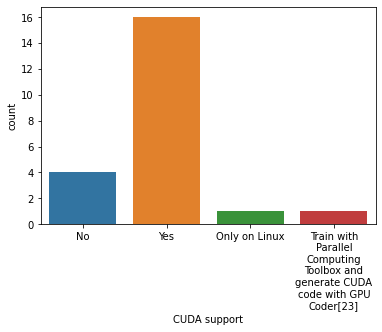

In [ ]:
ax = sns.countplot(df['CUDA support'])
labels = [textwrap.fill(label.get_text(), 16) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

In [ ]:
df.head(2)

,Creator,Initial release,Software license[a],Open source,Platform,Written in,Interface,OpenMP support,OpenCL support,CUDA support,ROCm support[1],Automatic differentiation[2],Has pretrained models,Recurrent nets,Convolutional nets,RBM/DBNs,Parallel execution (multi node),Actively developed
Software,,,,,,,,,,,,,,,,,,
BigDL,Jason Dai (Intel),2016-01-01,Apache 2.0,Yes,Apache Spark,Scala,"Scala, Python",NaN,NaN,No,No,NaN,Yes,Yes,Yes,NaN,NaN,NaN
Caffe,Berkeley Vision and Learning Center,2013-01-01,BSD,Yes,"Linux, macOS, Windows[3]",C++,"Python, MATLAB, C++",Yes,Under development[4],Yes,No,Yes,Yes[5],Yes,Yes,No,?,No[6]


In [ ]:
#selecting rows 
kpt_df = df.loc[['Keras','PyTorch','TensorFlow']]

In [ ]:
kpt_df

,Creator,Initial release,Software license[a],Open source,Platform,Written in,Interface,OpenMP support,OpenCL support,CUDA support,ROCm support[1],Automatic differentiation[2],Has pretrained models,Recurrent nets,Convolutional nets,RBM/DBNs,Parallel execution (multi node),Actively developed
Software,,,,,,,,,,,,,,,,,,
Keras,François Chollet,2015-01-01,MIT license,Yes,"Linux, macOS, Windows",Python,"Python, R",Only if using Theano as backend,"Can use Theano, Tensorflow or PlaidML as backends",Yes,No,Yes,Yes[20],Yes,Yes,No[21],Yes[22],Yes
PyTorch,"Adam Paszke, Sam Gross, Soumith Chintala, Greg...",2016-01-01,BSD,Yes,"Linux, macOS, Windows, Android[47]","Python, C, C++, CUDA","Python, C++, Julia",Yes,Via separately maintained package[48][49][50],Yes,Yes,Yes,Yes,Yes,Yes,Yes[51],Yes,Yes
TensorFlow,Google Brain,2015-01-01,Apache 2.0,Yes,"Linux, macOS, Windows,[52][53] Android","C++, Python, CUDA","Python (Keras), C/C++, Java, Go, JavaScript, R...",No,On roadmap[55] but already with SYCL[56] support,Yes,Yes,Yes[57],Yes[58],Yes,Yes,Yes,Yes,Yes


In [ ]:
kpt_df.shape

(3, 18)

In [ ]:
kpt_df.iloc[:,:10]

,Creator,Initial release,Software license[a],Open source,Platform,Written in,Interface,OpenMP support,OpenCL support,CUDA support
Software,,,,,,,,,,
Keras,François Chollet,2015-01-01,MIT license,Yes,"Linux, macOS, Windows",Python,"Python, R",Only if using Theano as backend,"Can use Theano, Tensorflow or PlaidML as backends",Yes
PyTorch,"Adam Paszke, Sam Gross, Soumith Chintala, Greg...",2016-01-01,BSD,Yes,"Linux, macOS, Windows, Android[47]","Python, C, C++, CUDA","Python, C++, Julia",Yes,Via separately maintained package[48][49][50],Yes
TensorFlow,Google Brain,2015-01-01,Apache 2.0,Yes,"Linux, macOS, Windows,[52][53] Android","C++, Python, CUDA","Python (Keras), C/C++, Java, Go, JavaScript, R...",No,On roadmap[55] but already with SYCL[56] support,Yes


In [ ]:
kpt_df.iloc[:,10:]

,ROCm support[1],Automatic differentiation[2],Has pretrained models,Recurrent nets,Convolutional nets,RBM/DBNs,Parallel execution (multi node),Actively developed
Software,,,,,,,,
Keras,No,Yes,Yes[20],Yes,Yes,No[21],Yes[22],Yes
PyTorch,Yes,Yes,Yes,Yes,Yes,Yes[51],Yes,Yes
TensorFlow,Yes,Yes[57],Yes[58],Yes,Yes,Yes,Yes,Yes
